***PREDICTING CLAIM AMOUNTS (INVOICED AMOUNT) FOR MEDICAL COVER PATIENTS***

**As an insurance company, being able to predict the amount of money a patient is likely to claim after securing medication in a certain 
health facility is key. It helps the insurance company predict the amount of money it will likely use to settle claims as well as avoid being defrauded.
In this project, I try to predict claims based on various metrics collected by a certain insurance company**.
**I collected data from one insurance company that shows various invoices from customers and accompanying personal information.
It is this data that I will be using to create a model that predicts the claim amount given various parameters**

*DATA EXPLORATION*

In [100]:
#Libraries for basic operations 
import joypy
import pandas as pd
import numpy as np
#libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates 
#for interactive visualizations 
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
#for animated visualizations
from bubbly.bubbly import bubbleplot
import plotly_express as px
#for providing path
import os
#for modelling
import sklearn
import imblearn
#for model explanation
import shap
import eli5
import datetime as dt


In [101]:
#loading the dataset
data=pd.read_csv("E:\data science practice\Ephantus.csv")
data

,AssessmentId,Member No,InvoiceDate,TreatmentDate,InvoiceStatus,InvoiceEntity,InvoiceEntityName,InvoicedAmount,SettledAmount,InvoiceLineStatus,...,Benefit_Limit,Category,AffectedSystemDesc,StartDate,JoinDate,RelationshipType,DOB,ClaimantGender,AnalysisCodeDesc,Age
0,12519968,1341765,9-Dec-18,5-Dec-18,Paid,1135,Nairobi Hospital,27835.9,27835.9,Paid,...,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,14-May-80,Female,HOSPITAL - MATERIALS,41
1,12523894,1108109,4-Dec-18,4-Dec-18,Paid,1180153,Kileleshwa Medical Plaza.,350.0,350.0,Paid,...,50000.0,Outpatient,Diseases of the digestive system,1-Jan-19,31-Dec-14,Principal,12-Aug-59,Male,PRESCRIPTIONS,62
2,12526743,1201842,26-Nov-18,26-Nov-18,Paid,166724,Dr. Sammy Kyalo.,2000.0,1500.0,Paid,...,100000.0,Outpatient,"Pregnancy, childbirth and the puerperium",1-Jan-19,1-Jan-20,Spouse,4-Aug-89,Female,CONSULTATION,32
3,12528158,1390198,12-Jan-19,12-Jan-19,Paid,138927,M. P. Shah Hospital (Social Service League),257.0,257.0,Paid,...,100000.0,Outpatient,Diseases of the respiratory system,9-Jan-19,9-Jan-19,Unmarried Child,28-Jan-18,Male,PRESCRIPTIONS,3
4,12519968,1341765,8-Dec-18,6-Dec-18,Paid,155465,Dr. Samuel Onyango Adongo.,50000.0,0.0,Declined,...,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,14-May-80,Female,IN-PATIENT DOCTOR`S FEE,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354422,13196291,1370941,13-May-19,13-May-19,Paid,138213,Acacia Medical Centre Ltd,1000.0,1000.0,Paid,...,10000000.0,Inpatient,Factors influencing health status and contact ...,1-Jan-19,1-Jan-19,Principal,11-Jun-91,Male,LABORATORY TESTS,30
354423,13202906,143304,26-Feb-18,26-Feb-18,Loaded,138213,Acacia Medical Centre Ltd,300.0,300.0,Loaded,...,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,28-Nov-80,Female,LABORATORY TESTS,41
354424,13202906,143304,26-Feb-18,26-Feb-18,Loaded,138213,Acacia Medical Centre Ltd,500.0,500.0,Loaded,...,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,28-Nov-80,Female,CONSULTATION,41
354425,13202906,143304,26-Feb-18,26-Feb-18,Loaded,138213,Acacia Medical Centre Ltd,1000.0,1000.0,Loaded,...,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,28-Nov-80,Female,LABORATORY TESTS,41


In [102]:
# showing the first five rows of the data
data.head()

,AssessmentId,Member No,InvoiceDate,TreatmentDate,InvoiceStatus,InvoiceEntity,InvoiceEntityName,InvoicedAmount,SettledAmount,InvoiceLineStatus,...,Benefit_Limit,Category,AffectedSystemDesc,StartDate,JoinDate,RelationshipType,DOB,ClaimantGender,AnalysisCodeDesc,Age
0,12519968,1341765,9-Dec-18,5-Dec-18,Paid,1135,Nairobi Hospital,27835.9,27835.9,Paid,...,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,14-May-80,Female,HOSPITAL - MATERIALS,41
1,12523894,1108109,4-Dec-18,4-Dec-18,Paid,1180153,Kileleshwa Medical Plaza.,350.0,350.0,Paid,...,50000.0,Outpatient,Diseases of the digestive system,1-Jan-19,31-Dec-14,Principal,12-Aug-59,Male,PRESCRIPTIONS,62
2,12526743,1201842,26-Nov-18,26-Nov-18,Paid,166724,Dr. Sammy Kyalo.,2000.0,1500.0,Paid,...,100000.0,Outpatient,"Pregnancy, childbirth and the puerperium",1-Jan-19,1-Jan-20,Spouse,4-Aug-89,Female,CONSULTATION,32
3,12528158,1390198,12-Jan-19,12-Jan-19,Paid,138927,M. P. Shah Hospital (Social Service League),257.0,257.0,Paid,...,100000.0,Outpatient,Diseases of the respiratory system,9-Jan-19,9-Jan-19,Unmarried Child,28-Jan-18,Male,PRESCRIPTIONS,3
4,12519968,1341765,8-Dec-18,6-Dec-18,Paid,155465,Dr. Samuel Onyango Adongo.,50000.0,0.0,Declined,...,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,14-May-80,Female,IN-PATIENT DOCTOR`S FEE,41


In [103]:
#showing the last five rows of the dataset
data.tail()

,AssessmentId,Member No,InvoiceDate,TreatmentDate,InvoiceStatus,InvoiceEntity,InvoiceEntityName,InvoicedAmount,SettledAmount,InvoiceLineStatus,...,Benefit_Limit,Category,AffectedSystemDesc,StartDate,JoinDate,RelationshipType,DOB,ClaimantGender,AnalysisCodeDesc,Age
354422,13196291,1370941,13-May-19,13-May-19,Paid,138213,Acacia Medical Centre Ltd,1000.0,1000.0,Paid,...,10000000.0,Inpatient,Factors influencing health status and contact ...,1-Jan-19,1-Jan-19,Principal,11-Jun-91,Male,LABORATORY TESTS,30
354423,13202906,143304,26-Feb-18,26-Feb-18,Loaded,138213,Acacia Medical Centre Ltd,300.0,300.0,Loaded,...,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,28-Nov-80,Female,LABORATORY TESTS,41
354424,13202906,143304,26-Feb-18,26-Feb-18,Loaded,138213,Acacia Medical Centre Ltd,500.0,500.0,Loaded,...,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,28-Nov-80,Female,CONSULTATION,41
354425,13202906,143304,26-Feb-18,26-Feb-18,Loaded,138213,Acacia Medical Centre Ltd,1000.0,1000.0,Loaded,...,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,28-Nov-80,Female,LABORATORY TESTS,41
354426,13255107,1407877,5-Feb-20,5-Feb-20,Loaded,1135,Nairobi Hospital,1440.0,1440.0,Loaded,...,250000.0,Outpatient,Factors influencing health status and contact ...,1-Mar-19,14-May-19,Unmarried Child,25-Jul-99,Female,LABORATORY TESTS,22


In [104]:
#summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354427 entries, 0 to 354426
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AssessmentId           354427 non-null  int64  
 1   Member No              354427 non-null  int64  
 2   InvoiceDate            354427 non-null  object 
 3   TreatmentDate          354427 non-null  object 
 4   InvoiceStatus          354427 non-null  object 
 5   InvoiceEntity          354427 non-null  int64  
 6   InvoiceEntityName      354427 non-null  object 
 7   InvoicedAmount         354378 non-null  float64
 8   SettledAmount          354378 non-null  float64
 9   InvoiceLineStatus      354378 non-null  object 
 10  AdmissionStatus        352934 non-null  object 
 11  InvoiceLineUserStatus  354378 non-null  object 
 12  InvoiceType            354427 non-null  int64  
 13  PaymentCurrencyName    354427 non-null  object 
 14  Benefit_Limit          353122 non-nu

In [105]:
# show the total number of rows and columns 
data.shape

(354427, 24)

In [106]:
# showing some vital statistics of the data
data.describe()

,AssessmentId,Member No,InvoiceEntity,InvoicedAmount,SettledAmount,InvoiceType,Benefit_Limit,Age
count,3.544270e+05,3.544270e+05,3.544270e+05,3.543780e+05,3.543780e+05,354427.000000,3.531220e+05,354427.000000
mean,1.276924e+07,1.191651e+06,4.461453e+05,2.123827e+03,2.011135e+03,1.004029,2.040518e+05,46.897708
std,1.170920e+05,3.824648e+05,5.122366e+05,1.426090e+04,1.346940e+04,0.063347,6.506546e+05,1364.184906
min,1.251997e+07,1.172000e+03,1.135000e+03,-5.912172e+05,-3.270000e+05,1.000000,1.000000e+04,1.000000
25%,1.267202e+07,1.215230e+06,1.382400e+05,3.600000e+02,3.400000e+02,1.000000,7.500000e+04,11.000000
50%,1.276788e+07,1.349354e+06,1.392120e+05,8.000000e+02,7.900000e+02,1.000000,1.000000e+05,31.000000
75%,1.286433e+07,1.388828e+06,1.140330e+06,1.500000e+03,1.500000e+03,1.000000,2.000000e+05,39.000000
max,1.325511e+07,1.448315e+06,1.444698e+06,4.862246e+06,4.862246e+06,2.000000,1.000000e+07,99999.000000


In [107]:
 #shows the type of data in the columns
data.dtypes

AssessmentId               int64
Member No                  int64
InvoiceDate               object
TreatmentDate             object
InvoiceStatus             object
InvoiceEntity              int64
InvoiceEntityName         object
InvoicedAmount           float64
SettledAmount            float64
InvoiceLineStatus         object
AdmissionStatus           object
InvoiceLineUserStatus     object
InvoiceType                int64
PaymentCurrencyName       object
Benefit_Limit            float64
Category                  object
AffectedSystemDesc        object
StartDate                 object
JoinDate                  object
RelationshipType          object
DOB                       object
ClaimantGender            object
AnalysisCodeDesc          object
Age                        int64
dtype: object

In [108]:
#show the missing values 
data.isnull()

,AssessmentId,Member No,InvoiceDate,TreatmentDate,InvoiceStatus,InvoiceEntity,InvoiceEntityName,InvoicedAmount,SettledAmount,InvoiceLineStatus,...,Benefit_Limit,Category,AffectedSystemDesc,StartDate,JoinDate,RelationshipType,DOB,ClaimantGender,AnalysisCodeDesc,Age
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
354423,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
354424,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
354425,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [109]:
#showing the totals in rows that are missing
data.isnull().sum()

AssessmentId                0
Member No                   0
InvoiceDate                 0
TreatmentDate               0
InvoiceStatus               0
InvoiceEntity               0
InvoiceEntityName           0
InvoicedAmount             49
SettledAmount              49
InvoiceLineStatus          49
AdmissionStatus          1493
InvoiceLineUserStatus      49
InvoiceType                 0
PaymentCurrencyName         0
Benefit_Limit            1305
Category                 1277
AffectedSystemDesc          0
StartDate                   0
JoinDate                    0
RelationshipType            0
DOB                        66
ClaimantGender            141
AnalysisCodeDesc         2521
Age                         0
dtype: int64

In [110]:
#show the names of the columns 
data.columns

Index(['AssessmentId', 'Member No', 'InvoiceDate', 'TreatmentDate',
       'InvoiceStatus', 'InvoiceEntity', 'InvoiceEntityName', 'InvoicedAmount',
       'SettledAmount', 'InvoiceLineStatus', 'AdmissionStatus',
       'InvoiceLineUserStatus', 'InvoiceType', 'PaymentCurrencyName',
       'Benefit_Limit', 'Category', 'AffectedSystemDesc', 'StartDate',
       'JoinDate', 'RelationshipType', 'DOB', 'ClaimantGender',
       'AnalysisCodeDesc', 'Age'],
      dtype='object')

***To deal with the missing values,***
***I decided to get rid of the rows that had missing values.***
***Since the data was large,*** 
***I figured that this move would have little effect on the outcome***


In [111]:
#removing the missing values
data.dropna(inplace=True) 
data

,AssessmentId,Member No,InvoiceDate,TreatmentDate,InvoiceStatus,InvoiceEntity,InvoiceEntityName,InvoicedAmount,SettledAmount,InvoiceLineStatus,...,Benefit_Limit,Category,AffectedSystemDesc,StartDate,JoinDate,RelationshipType,DOB,ClaimantGender,AnalysisCodeDesc,Age
0,12519968,1341765,9-Dec-18,5-Dec-18,Paid,1135,Nairobi Hospital,27835.9,27835.9,Paid,...,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,14-May-80,Female,HOSPITAL - MATERIALS,41
1,12523894,1108109,4-Dec-18,4-Dec-18,Paid,1180153,Kileleshwa Medical Plaza.,350.0,350.0,Paid,...,50000.0,Outpatient,Diseases of the digestive system,1-Jan-19,31-Dec-14,Principal,12-Aug-59,Male,PRESCRIPTIONS,62
2,12526743,1201842,26-Nov-18,26-Nov-18,Paid,166724,Dr. Sammy Kyalo.,2000.0,1500.0,Paid,...,100000.0,Outpatient,"Pregnancy, childbirth and the puerperium",1-Jan-19,1-Jan-20,Spouse,4-Aug-89,Female,CONSULTATION,32
3,12528158,1390198,12-Jan-19,12-Jan-19,Paid,138927,M. P. Shah Hospital (Social Service League),257.0,257.0,Paid,...,100000.0,Outpatient,Diseases of the respiratory system,9-Jan-19,9-Jan-19,Unmarried Child,28-Jan-18,Male,PRESCRIPTIONS,3
4,12519968,1341765,8-Dec-18,6-Dec-18,Paid,155465,Dr. Samuel Onyango Adongo.,50000.0,0.0,Declined,...,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,14-May-80,Female,IN-PATIENT DOCTOR`S FEE,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354422,13196291,1370941,13-May-19,13-May-19,Paid,138213,Acacia Medical Centre Ltd,1000.0,1000.0,Paid,...,10000000.0,Inpatient,Factors influencing health status and contact ...,1-Jan-19,1-Jan-19,Principal,11-Jun-91,Male,LABORATORY TESTS,30
354423,13202906,143304,26-Feb-18,26-Feb-18,Loaded,138213,Acacia Medical Centre Ltd,300.0,300.0,Loaded,...,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,28-Nov-80,Female,LABORATORY TESTS,41
354424,13202906,143304,26-Feb-18,26-Feb-18,Loaded,138213,Acacia Medical Centre Ltd,500.0,500.0,Loaded,...,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,28-Nov-80,Female,CONSULTATION,41
354425,13202906,143304,26-Feb-18,26-Feb-18,Loaded,138213,Acacia Medical Centre Ltd,1000.0,1000.0,Loaded,...,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,28-Nov-80,Female,LABORATORY TESTS,41


In [112]:
data.isnull().sum()

AssessmentId             0
Member No                0
InvoiceDate              0
TreatmentDate            0
InvoiceStatus            0
InvoiceEntity            0
InvoiceEntityName        0
InvoicedAmount           0
SettledAmount            0
InvoiceLineStatus        0
AdmissionStatus          0
InvoiceLineUserStatus    0
InvoiceType              0
PaymentCurrencyName      0
Benefit_Limit            0
Category                 0
AffectedSystemDesc       0
StartDate                0
JoinDate                 0
RelationshipType         0
DOB                      0
ClaimantGender           0
AnalysisCodeDesc         0
Age                      0
dtype: int64

***There are some columns I feel will not be used in training the model.***
***Such columns are dropped***

In [113]:
#removing some colums from the data set
data2=data.drop(['AssessmentId','Member No','InvoiceStatus','InvoiceEntityName','SettledAmount','InvoiceLineStatus','InvoiceLineUserStatus','InvoiceType','PaymentCurrencyName','DOB'],axis=1)
data2

,InvoiceDate,TreatmentDate,InvoiceEntity,InvoicedAmount,AdmissionStatus,Benefit_Limit,Category,AffectedSystemDesc,StartDate,JoinDate,RelationshipType,ClaimantGender,AnalysisCodeDesc,Age
0,9-Dec-18,5-Dec-18,1135,27835.9,In Patient,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,Female,HOSPITAL - MATERIALS,41
1,4-Dec-18,4-Dec-18,1180153,350.0,Out Patient,50000.0,Outpatient,Diseases of the digestive system,1-Jan-19,31-Dec-14,Principal,Male,PRESCRIPTIONS,62
2,26-Nov-18,26-Nov-18,166724,2000.0,Out Patient,100000.0,Outpatient,"Pregnancy, childbirth and the puerperium",1-Jan-19,1-Jan-20,Spouse,Female,CONSULTATION,32
3,12-Jan-19,12-Jan-19,138927,257.0,Out Patient,100000.0,Outpatient,Diseases of the respiratory system,9-Jan-19,9-Jan-19,Unmarried Child,Male,PRESCRIPTIONS,3
4,8-Dec-18,6-Dec-18,155465,50000.0,In Patient,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,Female,IN-PATIENT DOCTOR`S FEE,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354422,13-May-19,13-May-19,138213,1000.0,In Patient,10000000.0,Inpatient,Factors influencing health status and contact ...,1-Jan-19,1-Jan-19,Principal,Male,LABORATORY TESTS,30
354423,26-Feb-18,26-Feb-18,138213,300.0,In Patient,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,Female,LABORATORY TESTS,41
354424,26-Feb-18,26-Feb-18,138213,500.0,In Patient,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,Female,CONSULTATION,41
354425,26-Feb-18,26-Feb-18,138213,1000.0,In Patient,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,Female,LABORATORY TESTS,41


**DATA VISUALIZATIONS**

In [114]:
# counts the number of males and females
gender=pd.DataFrame(data['ClaimantGender'].value_counts())
gender

,ClaimantGender
Female,185630
Male,164897


([<matplotlib.patches.Wedge at 0x1481f251af0>,
 [Text(-0.12060875443865564, 1.2943931119844376, 'Female'),
  Text(0.10205356144809287, -1.095255710140678, 'Male')])

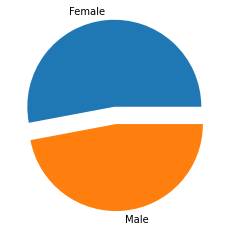

In [115]:
#plotting a piechart
plt.pie(gender['ClaimantGender'], labels=["Female", 'Male'], explode=(0.2,0))

In [116]:
# counts the number of beneficiaries depending on the relationshp
relationship=pd.DataFrame(data['RelationshipType'].value_counts())
relationship

,RelationshipType
Principal,162951
Unmarried Child,124542
Spouse,63034


([<matplotlib.patches.Wedge at 0x1481ed144f0>,
 [Text(0.13215207724271852, 1.1927010641734308, 'Principal'),
  Text(-0.7501501076631524, -0.9366294977059826, 'Unmarried Child'),
  Text(1.0135440780180718, -0.6424394149758379, 'Spouse')])

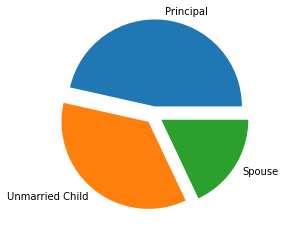

In [117]:
#plotting a piechart on the Relationship type
plt.pie(relationship['RelationshipType'], labels=["Principal", "Unmarried Child", "Spouse"],explode=(0.1,0.1,0.1))

In [118]:
# counts the number of patients in each category
admission_status=pd.DataFrame(data['AdmissionStatus'].value_counts())
admission_status

,AdmissionStatus
Out Patient,337943
In Patient,12227
Day Case,357


([<matplotlib.patches.Wedge at 0x1481ed51be0>,
 [Text(-1.192375959857518, 0.13505395349215935, 'Out patient'),
  Text(1.390594024365749, -0.16201314575759115, 'In patient'),
  Text(1.3999928336109488, -0.004479490817795795, 'Day Case')])

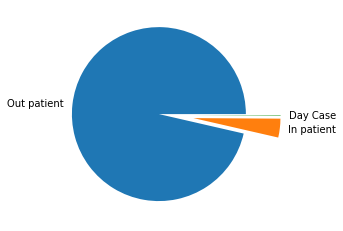

In [119]:
plt.pie(admission_status['AdmissionStatus'], labels=["Out patient", "In patient", "Day Case"],explode=(0.1,0.3,0.3))

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Category', ylabel='count'>

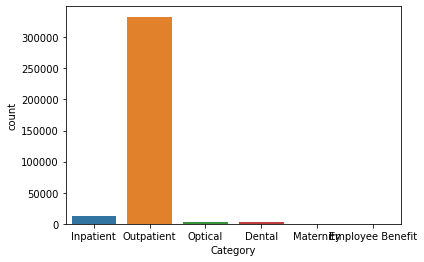

In [120]:
sns.countplot(data['Category'])

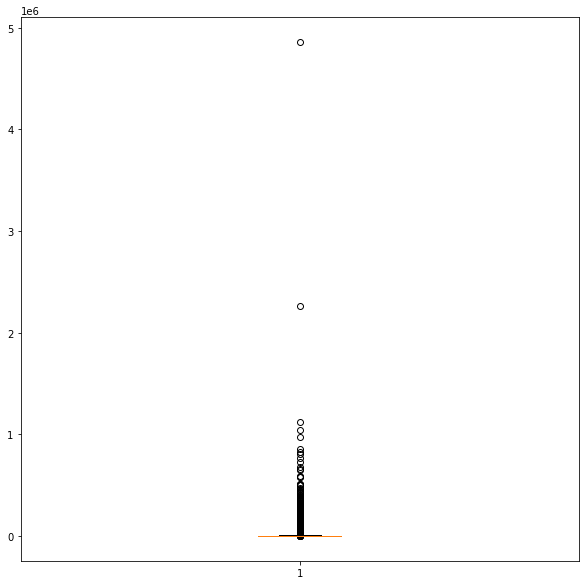

In [121]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(data2['InvoicedAmount'])
plt.show()

***The next step is replacing categorical data with numerical data in each column***

In [122]:
data2

,InvoiceDate,TreatmentDate,InvoiceEntity,InvoicedAmount,AdmissionStatus,Benefit_Limit,Category,AffectedSystemDesc,StartDate,JoinDate,RelationshipType,ClaimantGender,AnalysisCodeDesc,Age
0,9-Dec-18,5-Dec-18,1135,27835.9,In Patient,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,Female,HOSPITAL - MATERIALS,41
1,4-Dec-18,4-Dec-18,1180153,350.0,Out Patient,50000.0,Outpatient,Diseases of the digestive system,1-Jan-19,31-Dec-14,Principal,Male,PRESCRIPTIONS,62
2,26-Nov-18,26-Nov-18,166724,2000.0,Out Patient,100000.0,Outpatient,"Pregnancy, childbirth and the puerperium",1-Jan-19,1-Jan-20,Spouse,Female,CONSULTATION,32
3,12-Jan-19,12-Jan-19,138927,257.0,Out Patient,100000.0,Outpatient,Diseases of the respiratory system,9-Jan-19,9-Jan-19,Unmarried Child,Male,PRESCRIPTIONS,3
4,8-Dec-18,6-Dec-18,155465,50000.0,In Patient,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,Female,IN-PATIENT DOCTOR`S FEE,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354422,13-May-19,13-May-19,138213,1000.0,In Patient,10000000.0,Inpatient,Factors influencing health status and contact ...,1-Jan-19,1-Jan-19,Principal,Male,LABORATORY TESTS,30
354423,26-Feb-18,26-Feb-18,138213,300.0,In Patient,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,Female,LABORATORY TESTS,41
354424,26-Feb-18,26-Feb-18,138213,500.0,In Patient,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,Female,CONSULTATION,41
354425,26-Feb-18,26-Feb-18,138213,1000.0,In Patient,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,Female,LABORATORY TESTS,41


In [123]:
# We convert categorical data in the column category to numerical under column Cat
data2['Cat']=pd.factorize(data2.Category)[0]
data2

,InvoiceDate,TreatmentDate,InvoiceEntity,InvoicedAmount,AdmissionStatus,Benefit_Limit,Category,AffectedSystemDesc,StartDate,JoinDate,RelationshipType,ClaimantGender,AnalysisCodeDesc,Age,Cat
0,9-Dec-18,5-Dec-18,1135,27835.9,In Patient,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,Female,HOSPITAL - MATERIALS,41,0
1,4-Dec-18,4-Dec-18,1180153,350.0,Out Patient,50000.0,Outpatient,Diseases of the digestive system,1-Jan-19,31-Dec-14,Principal,Male,PRESCRIPTIONS,62,1
2,26-Nov-18,26-Nov-18,166724,2000.0,Out Patient,100000.0,Outpatient,"Pregnancy, childbirth and the puerperium",1-Jan-19,1-Jan-20,Spouse,Female,CONSULTATION,32,1
3,12-Jan-19,12-Jan-19,138927,257.0,Out Patient,100000.0,Outpatient,Diseases of the respiratory system,9-Jan-19,9-Jan-19,Unmarried Child,Male,PRESCRIPTIONS,3,1
4,8-Dec-18,6-Dec-18,155465,50000.0,In Patient,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,Female,IN-PATIENT DOCTOR`S FEE,41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354422,13-May-19,13-May-19,138213,1000.0,In Patient,10000000.0,Inpatient,Factors influencing health status and contact ...,1-Jan-19,1-Jan-19,Principal,Male,LABORATORY TESTS,30,0
354423,26-Feb-18,26-Feb-18,138213,300.0,In Patient,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,Female,LABORATORY TESTS,41,0
354424,26-Feb-18,26-Feb-18,138213,500.0,In Patient,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,Female,CONSULTATION,41,0
354425,26-Feb-18,26-Feb-18,138213,1000.0,In Patient,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,Female,LABORATORY TESTS,41,0


In [124]:
# We convert categorical data in the column AffectedSystemDesc to numerical under column systemaffected
data2['systemaffected']=pd.factorize(data2.AffectedSystemDesc)[0]


In [125]:
# We convert categorical data in the column RelationshipType to numerical under column relationship
data2['relationship']=pd.factorize(data2.RelationshipType)[0]
data2


,InvoiceDate,TreatmentDate,InvoiceEntity,InvoicedAmount,AdmissionStatus,Benefit_Limit,Category,AffectedSystemDesc,StartDate,JoinDate,RelationshipType,ClaimantGender,AnalysisCodeDesc,Age,Cat,systemaffected,relationship
0,9-Dec-18,5-Dec-18,1135,27835.9,In Patient,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,Female,HOSPITAL - MATERIALS,41,0,0,0
1,4-Dec-18,4-Dec-18,1180153,350.0,Out Patient,50000.0,Outpatient,Diseases of the digestive system,1-Jan-19,31-Dec-14,Principal,Male,PRESCRIPTIONS,62,1,1,0
2,26-Nov-18,26-Nov-18,166724,2000.0,Out Patient,100000.0,Outpatient,"Pregnancy, childbirth and the puerperium",1-Jan-19,1-Jan-20,Spouse,Female,CONSULTATION,32,1,2,1
3,12-Jan-19,12-Jan-19,138927,257.0,Out Patient,100000.0,Outpatient,Diseases of the respiratory system,9-Jan-19,9-Jan-19,Unmarried Child,Male,PRESCRIPTIONS,3,1,3,2
4,8-Dec-18,6-Dec-18,155465,50000.0,In Patient,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,Female,IN-PATIENT DOCTOR`S FEE,41,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354422,13-May-19,13-May-19,138213,1000.0,In Patient,10000000.0,Inpatient,Factors influencing health status and contact ...,1-Jan-19,1-Jan-19,Principal,Male,LABORATORY TESTS,30,0,9,0
354423,26-Feb-18,26-Feb-18,138213,300.0,In Patient,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,Female,LABORATORY TESTS,41,0,9,0
354424,26-Feb-18,26-Feb-18,138213,500.0,In Patient,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,Female,CONSULTATION,41,0,9,0
354425,26-Feb-18,26-Feb-18,138213,1000.0,In Patient,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,Female,LABORATORY TESTS,41,0,9,0


In [126]:
# We convert categorical data in the column ClaimantGender to numerical under column gender

data2['gender']=pd.factorize(data2.ClaimantGender)[0]


In [127]:
data2['Entity']=pd.factorize(data2.InvoiceEntity)[0]

In [128]:
# We convert categorical data in the column AnalysisCodeDesc to numerical under column analysis

data2['analysis']=pd.factorize(data2.AnalysisCodeDesc)[0]
data2.

,InvoiceDate,TreatmentDate,InvoiceEntity,InvoicedAmount,AdmissionStatus,Benefit_Limit,Category,AffectedSystemDesc,StartDate,JoinDate,RelationshipType,ClaimantGender,AnalysisCodeDesc,Age,Cat,systemaffected,relationship,gender,Entity,analysis
0,9-Dec-18,5-Dec-18,1135,27835.9,In Patient,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,Female,HOSPITAL - MATERIALS,41,0,0,0,0,0,0
1,4-Dec-18,4-Dec-18,1180153,350.0,Out Patient,50000.0,Outpatient,Diseases of the digestive system,1-Jan-19,31-Dec-14,Principal,Male,PRESCRIPTIONS,62,1,1,0,1,1,1
2,26-Nov-18,26-Nov-18,166724,2000.0,Out Patient,100000.0,Outpatient,"Pregnancy, childbirth and the puerperium",1-Jan-19,1-Jan-20,Spouse,Female,CONSULTATION,32,1,2,1,0,2,2
3,12-Jan-19,12-Jan-19,138927,257.0,Out Patient,100000.0,Outpatient,Diseases of the respiratory system,9-Jan-19,9-Jan-19,Unmarried Child,Male,PRESCRIPTIONS,3,1,3,2,1,3,1
4,8-Dec-18,6-Dec-18,155465,50000.0,In Patient,5000000.0,Inpatient,"Injury, poisoning and certain other consequenc...",1-Jan-19,1-Jan-18,Principal,Female,IN-PATIENT DOCTOR`S FEE,41,0,0,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354422,13-May-19,13-May-19,138213,1000.0,In Patient,10000000.0,Inpatient,Factors influencing health status and contact ...,1-Jan-19,1-Jan-19,Principal,Male,LABORATORY TESTS,30,0,9,0,1,88,5
354423,26-Feb-18,26-Feb-18,138213,300.0,In Patient,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,Female,LABORATORY TESTS,41,0,9,0,0,88,5
354424,26-Feb-18,26-Feb-18,138213,500.0,In Patient,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,Female,CONSULTATION,41,0,9,0,0,88,2
354425,26-Feb-18,26-Feb-18,138213,1000.0,In Patient,5000000.0,Inpatient,Factors influencing health status and contact ...,29-Jan-19,30-Jan-11,Principal,Female,LABORATORY TESTS,41,0,9,0,0,88,5


***since we have replaced categorical values with numerical values, we drop the original columns***

In [129]:
data3=data2.drop(['AdmissionStatus','Category','InvoiceEntity','AffectedSystemDesc','RelationshipType','ClaimantGender','AnalysisCodeDesc'],axis=1)
data3

,InvoiceDate,TreatmentDate,InvoicedAmount,Benefit_Limit,StartDate,JoinDate,Age,Cat,systemaffected,relationship,gender,Entity,analysis
0,9-Dec-18,5-Dec-18,27835.9,5000000.0,1-Jan-19,1-Jan-18,41,0,0,0,0,0,0
1,4-Dec-18,4-Dec-18,350.0,50000.0,1-Jan-19,31-Dec-14,62,1,1,0,1,1,1
2,26-Nov-18,26-Nov-18,2000.0,100000.0,1-Jan-19,1-Jan-20,32,1,2,1,0,2,2
3,12-Jan-19,12-Jan-19,257.0,100000.0,9-Jan-19,9-Jan-19,3,1,3,2,1,3,1
4,8-Dec-18,6-Dec-18,50000.0,5000000.0,1-Jan-19,1-Jan-18,41,0,0,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354422,13-May-19,13-May-19,1000.0,10000000.0,1-Jan-19,1-Jan-19,30,0,9,0,1,88,5
354423,26-Feb-18,26-Feb-18,300.0,5000000.0,29-Jan-19,30-Jan-11,41,0,9,0,0,88,5
354424,26-Feb-18,26-Feb-18,500.0,5000000.0,29-Jan-19,30-Jan-11,41,0,9,0,0,88,2
354425,26-Feb-18,26-Feb-18,1000.0,5000000.0,29-Jan-19,30-Jan-11,41,0,9,0,0,88,5


In [130]:
data3.dtypes

InvoiceDate        object
TreatmentDate      object
InvoicedAmount    float64
Benefit_Limit     float64
StartDate          object
JoinDate           object
Age                 int64
Cat                 int64
systemaffected      int64
relationship        int64
gender              int64
Entity              int64
analysis            int64
dtype: object

***We need to convert the dates to pandas format***

In [131]:
data3['InvoiceDate']=pd.to_datetime(data3.InvoiceDate)

In [132]:
data3['TreatmentDate']=pd.to_datetime(data3.TreatmentDate)


In [133]:
data3['StartDate']=pd.to_datetime(data3.StartDate)

In [134]:
data3['JoinDate']=pd.to_datetime(data3.JoinDate)
data3

,InvoiceDate,TreatmentDate,InvoicedAmount,Benefit_Limit,StartDate,JoinDate,Age,Cat,systemaffected,relationship,gender,Entity,analysis
0,2018-12-09,2018-12-05,27835.9,5000000.0,2019-01-01,2018-01-01,41,0,0,0,0,0,0
1,2018-12-04,2018-12-04,350.0,50000.0,2019-01-01,2014-12-31,62,1,1,0,1,1,1
2,2018-11-26,2018-11-26,2000.0,100000.0,2019-01-01,2020-01-01,32,1,2,1,0,2,2
3,2019-01-12,2019-01-12,257.0,100000.0,2019-01-09,2019-01-09,3,1,3,2,1,3,1
4,2018-12-08,2018-12-06,50000.0,5000000.0,2019-01-01,2018-01-01,41,0,0,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354422,2019-05-13,2019-05-13,1000.0,10000000.0,2019-01-01,2019-01-01,30,0,9,0,1,88,5
354423,2018-02-26,2018-02-26,300.0,5000000.0,2019-01-29,2011-01-30,41,0,9,0,0,88,5
354424,2018-02-26,2018-02-26,500.0,5000000.0,2019-01-29,2011-01-30,41,0,9,0,0,88,2
354425,2018-02-26,2018-02-26,1000.0,5000000.0,2019-01-29,2011-01-30,41,0,9,0,0,88,5


***DATA VISUALIZATIONS AND OUTLIER DETECTION***


<AxesSubplot:title={'center':'Invoiced Amount'}, xlabel='InvoiceDate', ylabel='InvoicedAmount'>

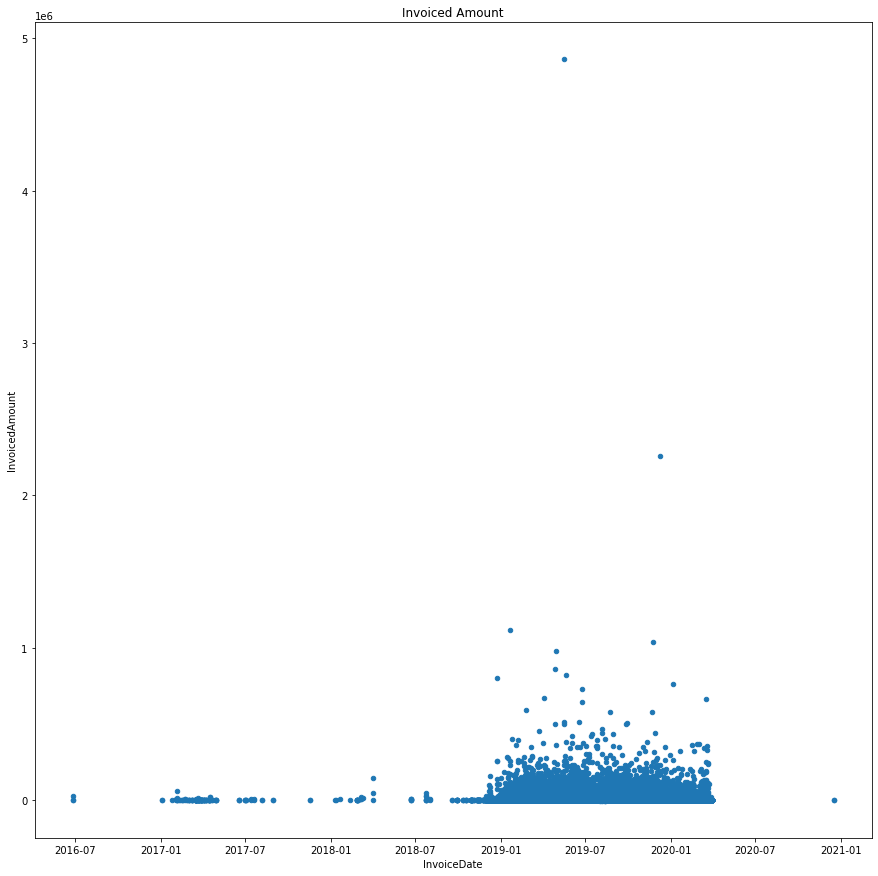

In [135]:
#Scatter plots for the invoiced amount
data3.plot.scatter(x='InvoiceDate', y='InvoicedAmount', title='Invoiced Amount', figsize=(15,15))


In [136]:
data3

,InvoiceDate,TreatmentDate,InvoicedAmount,Benefit_Limit,StartDate,JoinDate,Age,Cat,systemaffected,relationship,gender,Entity,analysis
0,2018-12-09,2018-12-05,27835.9,5000000.0,2019-01-01,2018-01-01,41,0,0,0,0,0,0
1,2018-12-04,2018-12-04,350.0,50000.0,2019-01-01,2014-12-31,62,1,1,0,1,1,1
2,2018-11-26,2018-11-26,2000.0,100000.0,2019-01-01,2020-01-01,32,1,2,1,0,2,2
3,2019-01-12,2019-01-12,257.0,100000.0,2019-01-09,2019-01-09,3,1,3,2,1,3,1
4,2018-12-08,2018-12-06,50000.0,5000000.0,2019-01-01,2018-01-01,41,0,0,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354422,2019-05-13,2019-05-13,1000.0,10000000.0,2019-01-01,2019-01-01,30,0,9,0,1,88,5
354423,2018-02-26,2018-02-26,300.0,5000000.0,2019-01-29,2011-01-30,41,0,9,0,0,88,5
354424,2018-02-26,2018-02-26,500.0,5000000.0,2019-01-29,2011-01-30,41,0,9,0,0,88,2
354425,2018-02-26,2018-02-26,1000.0,5000000.0,2019-01-29,2011-01-30,41,0,9,0,0,88,5


,RelationshipType
Principal,162951
Unmarried Child,124542
Spouse,63034


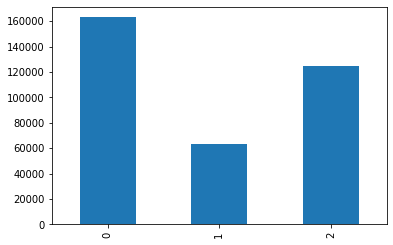

In [137]:
#Bar graph of the relationships type
data3['relationship'].value_counts().sort_index().plot.bar()
relationship=pd.DataFrame(data['RelationshipType'].value_counts())
relationship

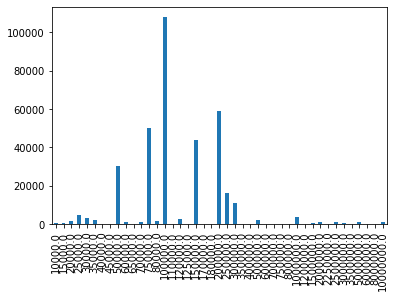

In [138]:
# A bar graph of the benefits limit
data3['Benefit_Limit'].value_counts().sort_index().plot.bar().figsize=(254,45)


Text(0, 0.5, 'Frequency')

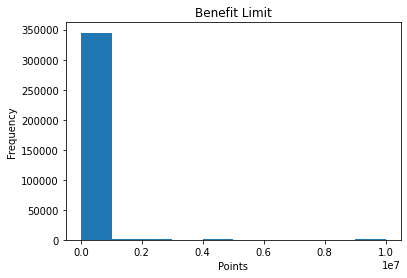

In [139]:
fig, ax = plt.subplots()
# plot histogram
ax.hist(data3['Benefit_Limit'])
# set title and labels
ax.set_title('Benefit Limit')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')


<function matplotlib.pyplot.show(close=None, block=None)>

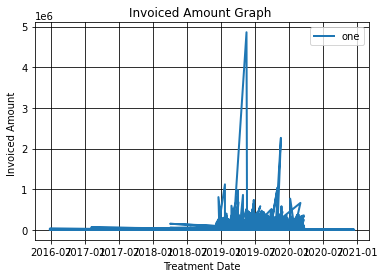

In [140]:
from  matplotlib import pyplot as plt 
from matplotlib import style 

#style.use('ggplot')

# X,y data 
x=data3['TreatmentDate']
y=data3['InvoicedAmount']



#plot canvas
plt.plot(x,y,label='one',linewidth=2)


plt.legend()
#title 
plt.title('Invoiced Amount Graph ')
plt.ylabel('Invoiced Amount ')
plt.xlabel('Treatment Date')


plt.grid(True,color='k')
#show graph 
plt.show

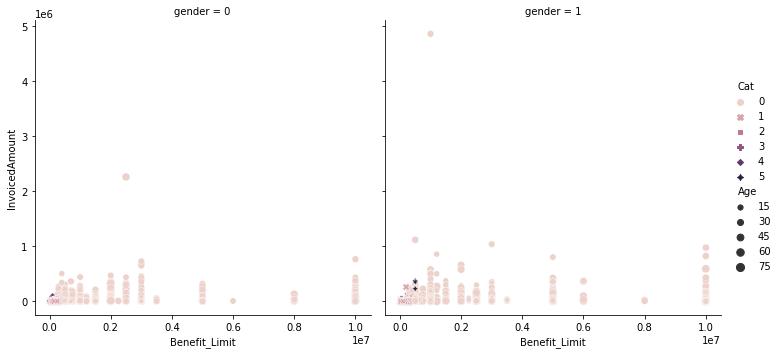

In [141]:
# A faceted scatter plot with multiple semantic variables.
sns.relplot(x="Benefit_Limit", y="InvoicedAmount", col="gender",
            hue="Cat", style="Cat", size="Age",
            data=data3);

***DETECTING OUTLIERS***

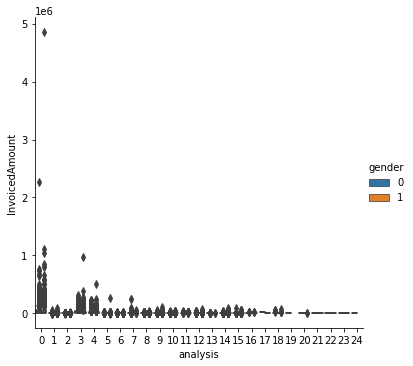

In [142]:
# boxplot 
sns.catplot(x="analysis", y="InvoicedAmount", hue="gender", data=data3, kind="box")

In [143]:
min_threshold, max_threshold=data3.InvoicedAmount.quantile([0.35,0.65])
min_threshold, max_threshold

(500.0, 1150.0)

In [144]:
# Values that are less than our minimum threshold
data3[data3.InvoicedAmount<min_threshold].head()

,InvoiceDate,TreatmentDate,InvoicedAmount,Benefit_Limit,StartDate,JoinDate,Age,Cat,systemaffected,relationship,gender,Entity,analysis
1,2018-12-04,2018-12-04,350.0,50000.0,2019-01-01,2014-12-31,62,1,1,0,1,1,1
3,2019-01-12,2019-01-12,257.0,100000.0,2019-01-09,2019-01-09,3,1,3,2,1,3,1
5,2018-12-15,2018-12-15,225.0,100000.0,2019-01-01,2020-01-01,36,1,4,0,0,5,1
12,2018-12-13,2018-12-13,268.2,100000.0,2019-01-01,2017-01-01,5,1,6,2,1,6,1
15,2019-01-14,2019-01-14,332.0,200000.0,2019-01-01,2019-01-01,31,1,1,1,0,9,1


In [145]:
#values that are greater than our maximum threshold
data3[data3.InvoicedAmount>max_threshold]

,InvoiceDate,TreatmentDate,InvoicedAmount,Benefit_Limit,StartDate,JoinDate,Age,Cat,systemaffected,relationship,gender,Entity,analysis
0,2018-12-09,2018-12-05,27835.90,5000000.0,2019-01-01,2018-01-01,41,0,0,0,0,0,0
2,2018-11-26,2018-11-26,2000.00,100000.0,2019-01-01,2020-01-01,32,1,2,1,0,2,2
4,2018-12-08,2018-12-06,50000.00,5000000.0,2019-01-01,2018-01-01,41,0,0,0,0,4,3
8,2019-01-09,2019-01-09,1278.48,100000.0,2019-01-09,2019-01-09,6,1,6,2,0,8,1
11,2019-01-15,2019-01-15,1248.00,100000.0,2019-01-09,2019-01-09,32,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354413,2020-01-15,2020-01-15,3500.00,200000.0,2019-01-16,2019-01-16,28,1,9,1,0,24,5
354416,2019-09-28,2019-09-28,2000.00,100000.0,2019-01-01,2019-04-12,2,1,9,2,1,952,1
354417,2020-03-25,2020-03-25,2200.00,100000.0,2019-02-01,2018-02-01,18,1,3,2,1,8,2
354421,2020-01-18,2020-01-18,1250.00,150000.0,2019-01-23,2018-01-29,40,1,4,1,0,29,5


In [146]:
#We remove the outliers
data4=data3[(data3.InvoicedAmount>min_threshold) & (data3.InvoicedAmount<max_threshold)]
data4.shape

(100019, 13)

In [147]:
# Converting the benefit limit from float to integers
data4['Benefit_Limit'] = data4['Benefit_Limit'].astype(int)

In [148]:
# Converting the Invoiced Amount from float to integers
data4['InvoicedAmount'] = data4['InvoicedAmount'].astype(int)

In [149]:
data4

,InvoiceDate,TreatmentDate,InvoicedAmount,Benefit_Limit,StartDate,JoinDate,Age,Cat,systemaffected,relationship,gender,Entity,analysis
6,2018-12-15,2018-12-15,1047,100000,2019-01-01,2018-01-29,3,1,1,2,0,6,1
7,2018-12-12,2018-12-12,1000,100000,2019-01-01,2018-01-25,4,1,5,2,0,7,2
9,2019-01-07,2019-01-07,602,200000,2019-01-01,2019-01-01,24,1,3,2,0,0,1
10,2019-01-07,2019-01-07,612,200000,2019-01-01,2019-01-01,24,1,3,2,0,0,1
27,2019-01-10,2019-01-10,1000,150000,2019-01-01,2019-01-01,40,1,7,1,1,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354404,2020-01-04,2020-01-04,600,150000,2019-01-16,2019-01-16,45,1,3,0,1,737,1
354410,2020-02-21,2020-02-21,1054,75000,2019-02-22,2019-04-16,27,1,7,1,0,0,1
354412,2020-02-17,2020-02-17,761,75000,2019-02-23,2019-11-08,10,1,3,2,0,5,1
354422,2019-05-13,2019-05-13,1000,10000000,2019-01-01,2019-01-01,30,0,9,0,1,88,5


***We then split the dates into years and months to allow for training***

In [150]:
data4["InvoiceDate"] = pd.to_datetime(data4["InvoiceDate"]).dt.date
data4["InvoiceMonth"] = pd.DatetimeIndex(data4["InvoiceDate"]).month
data4["InvoiceYear"] = pd.DatetimeIndex(data4["InvoiceDate"]).year


In [151]:
data4["TreatmentDate"] = pd.to_datetime(data4["TreatmentDate"]).dt.date
data4["TreatmentMonth"] = pd.DatetimeIndex(data4["TreatmentDate"]).month
data4["TreatmentYear"] = pd.DatetimeIndex(data4["TreatmentDate"]).year

In [152]:
data4["StartDate"] = pd.to_datetime(data4["StartDate"]).dt.date
data4["StartMonth"] = pd.DatetimeIndex(data4["StartDate"]).month
data4["StartYear"] = pd.DatetimeIndex(data4["StartDate"]).year

In [153]:
data4["JoinDate"] = pd.to_datetime(data4["JoinDate"]).dt.date
data4["JoinMonth"] = pd.DatetimeIndex(data4["JoinDate"]).month
data4["JoinYear"] = pd.DatetimeIndex(data4["JoinDate"]).year
data4

,InvoiceDate,TreatmentDate,InvoicedAmount,Benefit_Limit,StartDate,JoinDate,Age,Cat,systemaffected,relationship,...,Entity,analysis,InvoiceMonth,InvoiceYear,TreatmentMonth,TreatmentYear,StartMonth,StartYear,JoinMonth,JoinYear
6,2018-12-15,2018-12-15,1047,100000,2019-01-01,2018-01-29,3,1,1,2,...,6,1,12,2018,12,2018,1,2019,1,2018
7,2018-12-12,2018-12-12,1000,100000,2019-01-01,2018-01-25,4,1,5,2,...,7,2,12,2018,12,2018,1,2019,1,2018
9,2019-01-07,2019-01-07,602,200000,2019-01-01,2019-01-01,24,1,3,2,...,0,1,1,2019,1,2019,1,2019,1,2019
10,2019-01-07,2019-01-07,612,200000,2019-01-01,2019-01-01,24,1,3,2,...,0,1,1,2019,1,2019,1,2019,1,2019
27,2019-01-10,2019-01-10,1000,150000,2019-01-01,2019-01-01,40,1,7,1,...,15,2,1,2019,1,2019,1,2019,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354404,2020-01-04,2020-01-04,600,150000,2019-01-16,2019-01-16,45,1,3,0,...,737,1,1,2020,1,2020,1,2019,1,2019
354410,2020-02-21,2020-02-21,1054,75000,2019-02-22,2019-04-16,27,1,7,1,...,0,1,2,2020,2,2020,2,2019,4,2019
354412,2020-02-17,2020-02-17,761,75000,2019-02-23,2019-11-08,10,1,3,2,...,5,1,2,2020,2,2020,2,2019,11,2019
354422,2019-05-13,2019-05-13,1000,10000000,2019-01-01,2019-01-01,30,0,9,0,...,88,5,5,2019,5,2019,1,2019,1,2019


***Model building***

In [154]:
# Create X (all the feature columns)

X=data4.drop(['InvoicedAmount','InvoiceDate','TreatmentDate','JoinDate','StartDate','JoinDate'], axis=1)
# Create y (the target column)
y = data4["InvoicedAmount"]

In [155]:
X.head()

,Benefit_Limit,Age,Cat,systemaffected,relationship,gender,Entity,analysis,InvoiceMonth,InvoiceYear,TreatmentMonth,TreatmentYear,StartMonth,StartYear,JoinMonth,JoinYear
6,100000,3,1,1,2,0,6,1,12,2018,12,2018,1,2019,1,2018
7,100000,4,1,5,2,0,7,2,12,2018,12,2018,1,2019,1,2018
9,200000,24,1,3,2,0,0,1,1,2019,1,2019,1,2019,1,2019
10,200000,24,1,3,2,0,0,1,1,2019,1,2019,1,2019,1,2019
27,150000,40,1,7,1,1,15,2,1,2019,1,2019,1,2019,1,2019


In [156]:
X.dtypes

Benefit_Limit     int32
Age               int64
Cat               int64
systemaffected    int64
relationship      int64
gender            int64
Entity            int64
analysis          int64
InvoiceMonth      int64
InvoiceYear       int64
TreatmentMonth    int64
TreatmentYear     int64
StartMonth        int64
StartYear         int64
JoinMonth         int64
JoinYear          int64
dtype: object

In [157]:
y.head()

6     1047
7     1000
9      602
10     612
27    1000
Name: InvoicedAmount, dtype: int32

In [158]:
# check if balanced data set 
y.head(), y.value_counts()

(6     1047
 7     1000
 9      602
 10     612
 27    1000
 Name: InvoicedAmount, dtype: int32,
 1000    19168
 800     10538
 600      7288
 700      4653
 900      4350
         ...  
 1021        4
 1098        4
 943         4
 991         3
 916         3
 Name: InvoicedAmount, Length: 649, dtype: int64)

**We divide the data into training and test data**


In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

**Feature Scaling**

In [160]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***Training the algorithm***

In [162]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=110, random_state=123)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([928.03787879, 800.        , 775.40787879, ..., 755.06318182,
       945.45454545, 780.15151515])

 ***Evaluating the performance of the Algorithm***

In [163]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 108.86217081253066
Mean Squared Error: 24781.28556773851
Root Mean Squared Error: 157.42072788466743


In [164]:
from sklearn.metrics import mean_squared_error
#get the prediction of the model for the data it has not seen
y_pred_test=linear_regression_model.predict(X_test)
#compare how close the predicted value is to the actual value
error_metric=mean_squared_error(y_pred=y_pred_test, y_true=y_test)
print ('The mean square error of this model is:', error_metric)

The mean square error of this model is: 4.816288298194891e+25


In [165]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
#Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

#Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
#Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 108.86 degrees.
Accuracy: 85.49 %.


In [166]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test})
df

,Actual,Predicted
181228,950,832.224338
241392,800,802.095918
120344,570,801.674043
119356,600,813.838458
130354,1127,803.033412
...,...,...
98012,520,834.494356
301644,661,792.822481
224408,838,799.094695
345251,800,802.838458


In [167]:
df.head()

,Actual,Predicted
181228,950,832.224338
241392,800,802.095918
120344,570,801.674043
119356,600,813.838458
130354,1127,803.033412


In [168]:
df.tail()

,Actual,Predicted
98012,520,834.494356
301644,661,792.822481
224408,838,799.094695
345251,800,802.838458
81811,800,834.631248


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


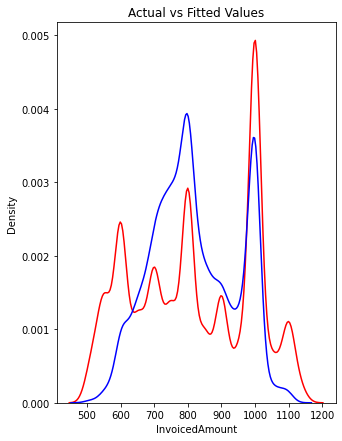

In [171]:
import seaborn as sns
plt.figure(figsize=(5, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values')
plt.show()
plt.close()